In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
from math import exp
from matplotlib import pyplot as plt
from random import randint
from tqdm import tqdm
plt.ion()
sns.set()

In [56]:
colors = [['#d8c7ff' for j in range(20)] for i in range(20)]
for i in range(20):
    for j in range(20):
        if (i == 0 or i==19 or j==0 or j==19):
            colors[i][j] = '#000000'
colors[2][5] = '#000000'
for i in range(2,5):
    colors[i][5] = '#000000'
for i in range(3,17):
    colors[4][i] = '#000000'
for i in range(4,8):
    colors[i][3] = '#000000'
for i in range(6,13):
    colors[i][6] = '#000000'
for i in range(1,5):
    colors[10][i] = '#000000'
for i in range(3,8):
    colors[12][i] = '#000000'
for i in range(12,16):
    colors[i][7] = '#000000'
for i in range(1,3):
    colors[17][i] = '#000000'
for i in range(7,13):
    colors[17][i] = '#000000'
for i in range(6, 11):
    colors[i][9] = '#000000'
for i in range(10,15):
    colors[i][10] = '#000000'
for i in range(7,13):
    colors[17][i] = '#000000'
for i in range(11,16):
    colors[i][13] = '#000000'
for i in range(13,17):
    colors[15][i] = '#000000'
for i in range(12,16):
    colors[7][i] = '#000000'
for i in range(6,12):
    colors[i][15] = '#000000'
for i in range(15,18):
    colors[11][i] = '#000000'
for i in range(11,14):
    colors[i][17] = '#000000'

    

In [57]:


def getTable(cell_values, ax):
    val1 = [str(i) for i in range(20)] 
    val2 = ["  " + str(i) + "  " for i in range(20)] 
    #fig, ax = plt.subplots(figsize=(15,10)) 
    ax.set_axis_off() 
    table = ax.table( 
        cellText = cell_values, #empty values 
        rowLabels = val2,  
        colLabels = val1, 
        rowColours =["w"] * 20,  
        colColours =["w"] * 20, 
        cellColours=colors,
        cellLoc ='center',
        loc ='center')  
    table.scale(xscale= 1.2, yscale=1.3)

    #Adding walls


    ax.set_title('matplotlib.axes.Axes.table() function Example', 
                 fontweight ="bold")
    ax.add_table(table)
    return table

In [58]:
def show_policy(Q,ax):
    pi_str = ['' for i in range(400)]
    for index, q in enumerate(Q):
        a = np.argmax(q)
        if(a == 0):
            pi_str[index] += '↓'
        if(a ==1):
            pi_str[index] += '↑'
        if(a == 2):
            pi_str[index] += '←'
        if(a == 3):
            pi_str[index] += '→'
    pi_str = np.asarray(pi_str)
    return (pi_str,getTable(pi_str.reshape((20,20)), ax))
    

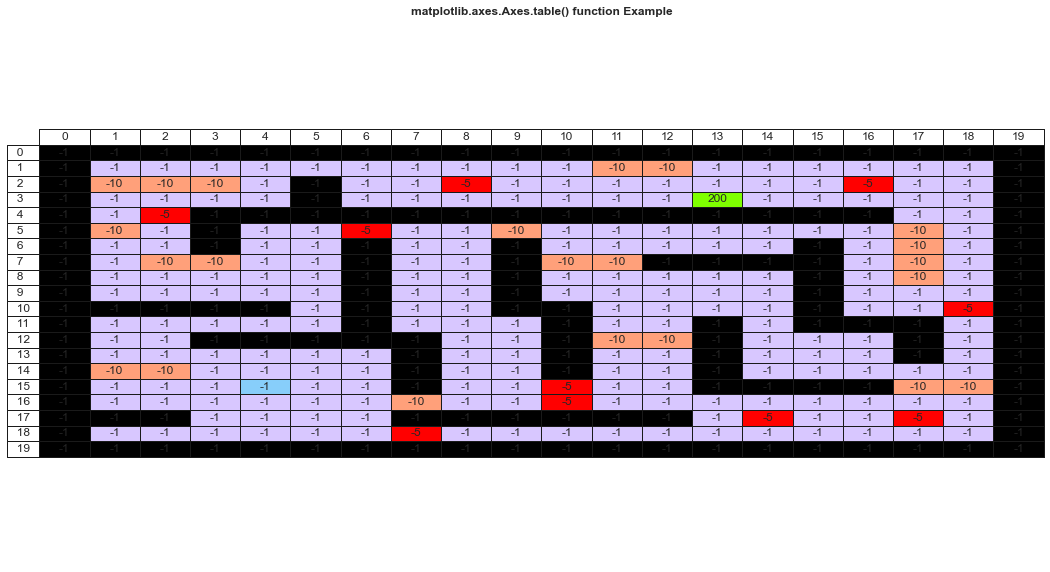

In [59]:
#reward space
rewards = [-1 for r in range(20*20)]

oil = [[4,2],[5,6],[2,8],[2,16],[5,6],[10,18],[18,7], [15,10],[16,10],[17,17],
      [17,14]]
for cell in oil:
    rewards[(20*cell[0])+cell[1]] = -5
    colors[cell[0]][cell[1]] = '#FF0000'
     

bump = [[1,11],[1,12],[2,1],[2,2],[2,3], [5,17],[6,17], [7,17],[8,17],
       [14,1],[14,2],[15,18],[15,17],[16,7],[5,1],[5,9],[7,3],[5,9],[7,2],
       [7,10],[7,11],[12,11],[12,12]]
for cell in bump:
    rewards[(20*cell[0])+cell[1]] = -10
    colors[cell[0]][cell[1]] = '#FFA07A'

#cell_values[3][13] = '200'
rewards[(20*3)+13] = 200
colors[3][13] = '#7FFF00'

colors[15][4] = '#87CEFA'

rewards = np.asarray(rewards)

fig, ax = plt.subplots(figsize=(15,10))

r_table = getTable(rewards.reshape((20,20)), ax)
plt.show()

In [153]:
def get_path(table):
    i = 16
    j = 4
    while( (colors[i-1][j] != '#7FFF00' and colors[i-1][j] != '#000000') and table[i,j].get_text().get_color() != 'r'):
        
        table[i, j].get_text().set_color('r')
         #get direction of arrow
        direction = table[i,j].get_text().get_text()
        #move in that direction 
        if(direction == '↓'):
            i += 1
        if(direction == '↑'):
            i -= 1
        if(direction == '←'):
            j -= 1
        if(direction == '→'):
            j += 1
      
    

In [60]:
def get_action(Q, s, e):
    actions = [20, -20, -1, 1]
    if(randint(1, 100) < (e*100)):
        a_index = randint(0,3)
        return a_index, actions[a_index] #randomly pick action
    else:
        a = np.argwhere(Q[s] == np.amax(Q[s])).flatten() 
        a = a[np.random.randint(low=len(a))]
        return a, actions[a]

In [61]:
def get_next_state(s,a): #returns next state
        r = randint(1,100)
        actions = [20, -20, -1, 1]
        if(r <= 98):
            if(colors[int( (s+a) / 20 )][ (s+a) % 20  ] != '#000000'):
                return s+a
            else: return s
        else:
            s_p = s + actions[randint(0,3)]
            if(colors[int( s_p / 20 )][ s_p % 20  ] != '#000000'):
                return s_p
            else: return s
            

In [169]:
def sarsa(epsilon, alpha, run=1):
    #Q = np.asarray([np.random.random(4)-1 for i in range(400)]) #randomize each action via np.random
    Q = np.zeros((400,4))
    s_avg = np.zeros(1001)
    for i in range(1,1001): #episodes
        #print('on episode {}'.format(i))
        s = 20*15 + 4
        a_i, a = get_action(Q, s, epsilon(1)) #returns +20, -20, +1, -1    
        #print('on episode {}'.format(i))
        index = 1
        while s != 20*3+13:
            s_p = get_next_state(s,a)
            r = rewards[s+a] 
            s_avg[i] = s_avg[i] + (1/index) * (r - s_avg[i])
            ap_i, ap = get_action(Q, s_p, epsilon(index))
            Q[s][a_i] = Q[s][a_i] + alpha(index) * (r + 0.95*Q[s_p][ap_i] - Q[s][a_i])
            s = s_p
            a = ap
            a_i = ap_i
            index += 1
            if(index >= 10000):
                break
    #update s_avg
    return Q, s_avg
    
    

In [170]:
def q_learning(epsilon, alpha, run=1):
    Q = np.zeros((400,4)) # TODO: randomize each action via np.random
    q_avg = np.zeros(1001)
    for i in range(1,1001): #episodes
        s = 20*15 + 4
        #print('on episode {}'.format(i))
        index = 1
        while s != 20*3+13:
            a_i, a =  get_action(Q, s, epsilon(index))
            s_p = get_next_state(s,a)
            r = rewards[s+a]
            q_avg[i] = q_avg[i] + (1/index) * (r - q_avg[i])
            Q[s][a_i] += alpha(index) * (r + 0.95*max(Q[s_p]) - Q[s][a_i])
            s = s_p
            index +=1
            if(index >= 10000):
                break

        
    #update q_avg
    return Q, q_avg
    

#### SARSA

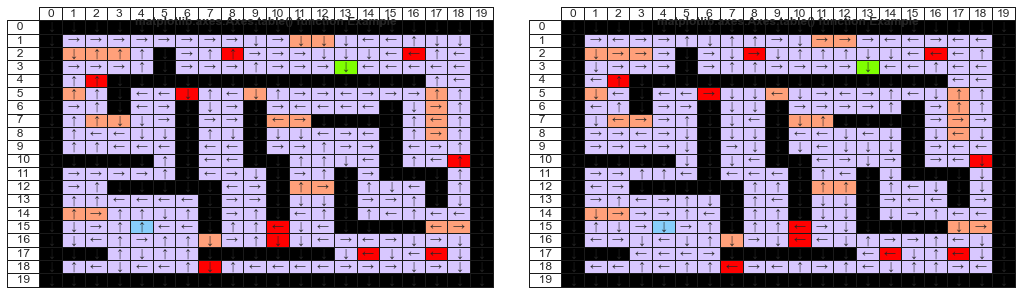

In [152]:
#Optimal Policy of one of the independent runs where epsilon = 0.1, alpha = 0.3
fig, ax = plt.subplots(1,2, figsize=(15,5))

Q, s_avg = sarsa(lambda x : 0.1, lambda x : 0.3)
pi, table = show_policy(Q, ax[0])

Q, s_avg = sarsa(lambda x : exp((-1*x)/1000), lambda x : exp((-1*x)/3500))
pi_2, table_2 = show_policy(Q, ax[1])

fig.tight_layout(pad=3.0)

plt.show()

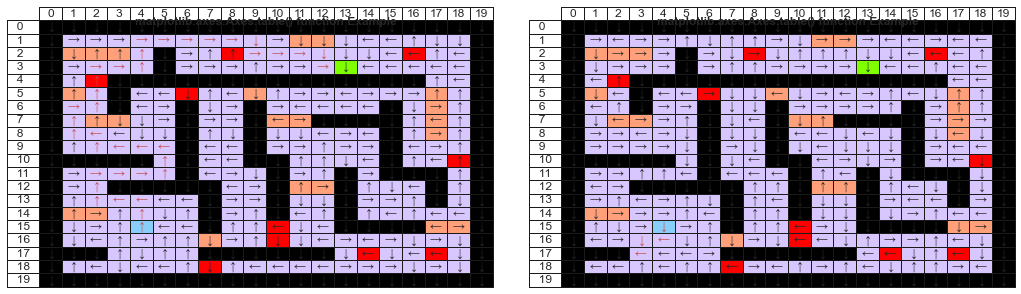

In [154]:
get_path(table)
get_path(table_2)
fig

#### Q-Learning

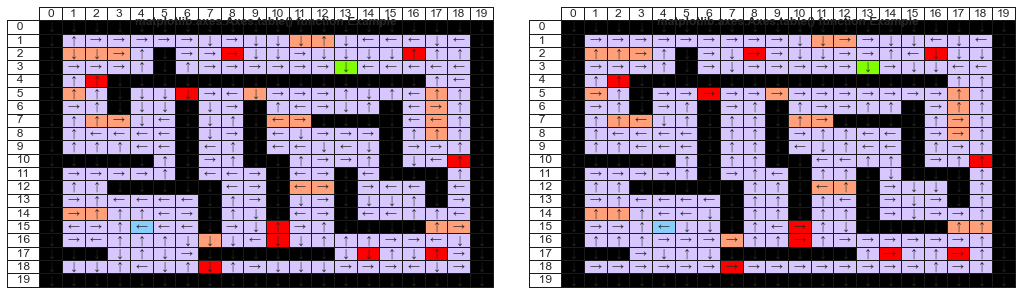

In [166]:
#Optimal Policy of one of the independent runs where epsilon = 0.1, alpha = 0.3
fig, ax = plt.subplots(1,2, figsize=(15,5))

Q, q_avg = q_learning(lambda x : 0.1, lambda x : 0.3)
_, table_3 = show_policy(Q, ax[0])

Q, q_avg = q_learning(lambda x : exp((-1*x)/1000), lambda x : exp((-1*x)/3500))
_2, table_4 = show_policy(Q, ax[1])

fig.tight_layout(pad=3.0)

plt.show()

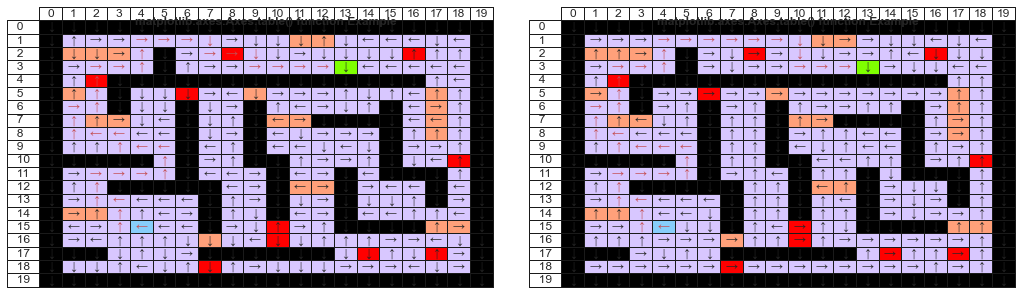

In [167]:
get_path(table_3)
get_path(table_4)
fig

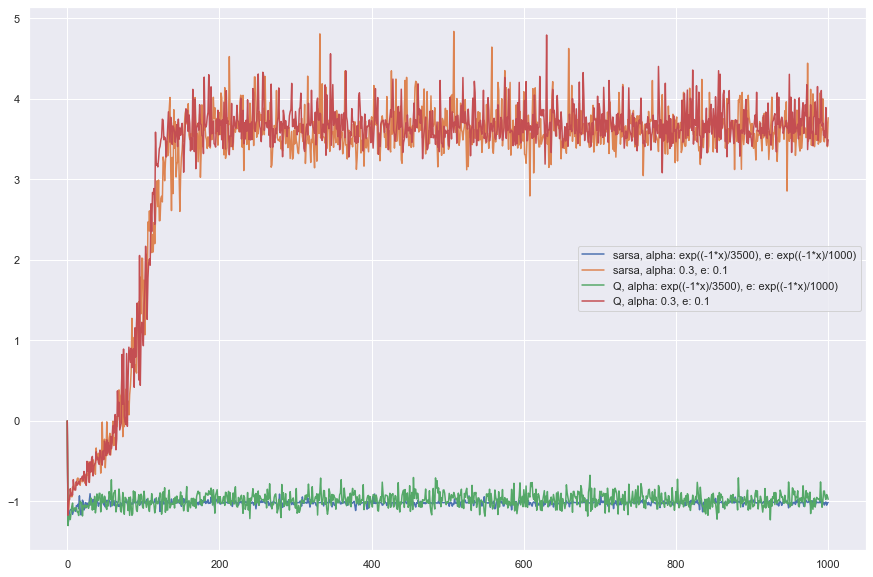

In [171]:
fig, ax = plt.subplots(figsize=(15,10))


for func in [sarsa, q_learning]:
    for alpha, epsilon in [(lambda x : exp((-1*x)/3500), lambda x : exp((-1*x)/1000))  , (lambda x : 0.3, lambda x : 0.1)]:
        r_avg = np.zeros(1001)
        for k in range(1,11):
            Q, avg = func(epsilon, alpha)
            r_avg = r_avg + (1/k) * (avg - r_avg)
            #print('{} run complete'.format(k))
        ax.plot([i for i in range(0,1001)], r_avg)
       # print('iteration done')
ax.legend(['sarsa, alpha: exp((-1*x)/3500), e: exp((-1*x)/1000)', 'sarsa, alpha: 0.3, e: 0.1',
        'Q, alpha: exp((-1*x)/3500), e: exp((-1*x)/1000)', 'Q, alpha: 0.3, e: 0.1'])
plt.show()


### Sarsa

The stochasiticity of the system heavily influcnes the resulatant policy outputted by SARSA. In this scenario, stochasity comes primarily from epsilon. When epsilon is 0.1 and alpha is 0.3, SARSA was able to output the optimal path to the goal state. This was expexted since an epsilon on 0.1 induces some exploration for each state the agent is in. By having an epsilon value of 0.1, too much exploration was not an issue. Had this been the case, the values of each Q(s,a) would flucuate significantly and would result in sub-optimal paths. An alpha value of 0.3 means our agent's Q(s,a) value is influenced partially by the reward and <s',a'>. By not having too high of an alpha value, our <s,a> once again does not fluctuate too significantly for any given epsiode. Due to the low stochasitiy caused by epsilon, once the agent learns the optimal path, the policy should not change significantly. However, epsilon allows for enough exploration so that when the optimal path is found, the Q(s,a) values stabilize relatively quickly. The result is a high average reward per episode, with a quick ascent to the optimal policy.  

When alpha = exp((-1*x)/3500) and epsilon = exp((-1*x)/1000), SARSA is unable to find the optimal policy. This is because epsilon slowly descends from a value of 1. This high degree of stochasiticiy means the agent is selecting random actions for nearly every state and updating its Q(s,a) by using a random a' for a given s'. The result is highly volatile Q(s,a) values, which are exacerbated by the high alpha value. The high stochasity also results in a low average reward per episode as the agent wanders around the grid. Even as the number of itertions increased and epsilon and alpha approach 0, the agent was not able to reach the terminal state. For this reason I placed an artifical break that would halt the program after 10,000 iterations for any given epsiode. 


### Q-Learning

The policy from Q-Learning is not heavily influenced by the epsilon value. For this reason both scenarios were able to find the optimal path. When epsilon = 0.1 and alpha = 0.3, the agent was able to explore enough such that every Q(s,a) updated its value based off of the optimal action for s'. When epsilon is exp((-1*x)/1000) and alpha is exp((-1*x)/3500), the agent has a high degree of exploration. This sampling of many <s,a> still results in the optimal policy as the agent uses this samples to determine the max update value for a given Q(s,a). The high alpha value further cause significant changes to Q(s,a) toward more favorable states. After determining the maximum Q(s,a) for all actions in state s, the best value is used to make the policy. The result is a less flucuations of Q(s,a) and a convergence to the optimal policy. While Q-learning allows the optimal policy to be formed, a high epsilon value prevents the agent from recieving the maximum reward. This is why the average reward when epsilon is exp((-1*x)/1000) is significantly lower than when epsilon is 0.1.

### P-values and Discount factor 

Both scenarios had a p-value of 0.02 and a discount factor of 0.95. This resulted in a high degree of weight being placed in the expected Q(s', *) given the current state s and action a. This made each Q(s,a) reliable indicators of the "goodness" of each state-action pair since the there is a high degree of confidence that it will take us to the expected state. Ultimately this contributed to the agent's ability to find the optimal policy for the for scenario 1 of SARSA and scenario 1 and 2 for Q-Learning. A discount factor of 0.95 allowed the agent to weight later rewards into the policy formation. This also contributed to the agent's ability to find the optimal policy as it allowed the agent to make trade the penalty of going through oil and bumps for the terminal state's reward.  